In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
from datetime import date
from datetime import timedelta

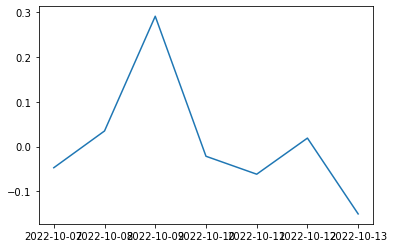

In [41]:
plt.plot(group_F['comp'].mean())

In [4]:
df_F = pd.read_csv('fetterman_tmp_data.csv', index_col=[0])
df_M = pd.read_csv('mehmet_tmp_data.csv', index_col=[0])

In [5]:
df_F.head()

,timestamp,text
0,2022-10-09 00:59:51+00:00,"RT @DrOz: If John Fetterman got his way, he wo..."
1,2022-10-09 00:59:36+00:00,"RT @DrOz: If John Fetterman got his way, he wo..."
2,2022-10-09 00:59:29+00:00,RT @ProudElephantUS: John Fetterman wants to t...
3,2022-10-09 00:59:26+00:00,RT @RNCResearch: John Fetterman: “Thank you so...
4,2022-10-09 00:59:22+00:00,RT @thepugnews: Dr. Mehmet Oz has turned his a...


In [6]:
df_F['timestamp'].values[1][:10]
#df_F['timestamp'][0]

'2022-10-09'

In [7]:
date_list = [datetime.strptime(stamp[:10],'%Y-%m-%d') for stamp in df_F['timestamp'].values]
date_list2 = [datetime.strptime(stamp[:10],'%Y-%m-%d') for stamp in df_M['timestamp'].values]

In [8]:
df_F['date'] = date_list
df_M['date'] = date_list2

In [9]:
data_F = df_F[['text', 'date']]
data_M = df_M[['text', 'date']]

In [10]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

tweets = data_F['text'].values
noOfTweet = 1000
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
comp_list = []

for tweet in tweets:
    
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    neutral_list += [neu]
    negative_list += [neg]
    positive_list += [pos]
    comp_list += [comp]
    
data_F['neg_score'] = negative_list
data_F['neu_score'] = neutral_list
data_F['pos_score'] = positive_list
data_F['comp'] = comp_list

In [11]:
tweets = data_M['text'].values
noOfTweet = 1000
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
comp_list = []

for tweet in tweets:
    
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    neutral_list += [neu]
    negative_list += [neg]
    positive_list += [pos]
    comp_list += [comp]
    
data_M['neg_score'] = negative_list
data_M['neu_score'] = neutral_list
data_M['pos_score'] = positive_list
data_M['comp'] = comp_list

In [12]:
data_F
data_M

,text,date,neg_score,neu_score,pos_score,comp
0,Mehmet Oz Gives Speech Near Hitler's Car And C...,2022-10-09,0.000,1.000,0.000,0.0000
1,RT @TristanSnell: Herschel Walker — pays for a...,2022-10-09,0.148,0.741,0.111,-0.2263
2,RT @TristanSnell: Herschel Walker — pays for a...,2022-10-09,0.148,0.741,0.111,-0.2263
3,RT @KylaInTheBurgh: In just one week we learne...,2022-10-09,0.260,0.740,0.000,-0.8442
4,RT @TristanSnell: Herschel Walker — pays for a...,2022-10-09,0.148,0.741,0.111,-0.2263
...,...,...,...,...,...,...
7144,RT @TristanSnell: Mehmet Oz said he believes b...,2022-10-14,0.000,1.000,0.000,0.0000
7145,RT @MollyJongFast: He was paying her https://...,2022-10-14,0.000,1.000,0.000,0.0000
7146,RT @NoLieWithBTC: NEW: Dr. Oz staged an event ...,2022-10-14,0.220,0.780,0.000,-0.7579
7147,RT @NoLieWithBTC: NEW: Dr. Oz staged an event ...,2022-10-14,0.220,0.780,0.000,-0.7579


In [13]:
group_F = data_F.groupby(['date'])
group_M = data_M.groupby(['date'])

In [14]:
group_F['comp'].mean()

date
2022-10-09   -0.103673
2022-10-10   -0.123326
2022-10-11   -0.110766
2022-10-12    0.081829
2022-10-13   -0.056345
2022-10-14   -0.047665
Name: comp, dtype: float64

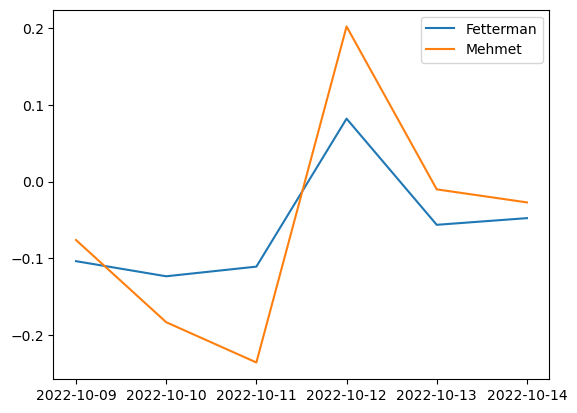

In [15]:
plt.plot(group_F['comp'].mean(),label='Fetterman')
plt.plot(group_M['comp'].mean(),label='Mehmet')
plt.legend()
plt.show()

In [91]:
# data_M[data_M['date'] == '2022-10-11']['text'].values

In [92]:
# tmp_tweets = list(data_M[data_M['date'] == '2022-10-11']['text'])
# noOfTweet = len(tmp_tweets)

In [100]:
#Sentiment Analysis
def percentage(part,whole):
     return 100 * float(part)/float(whole)

total number:  1200
positive number:  359
negative number:  474
neutral number:  367


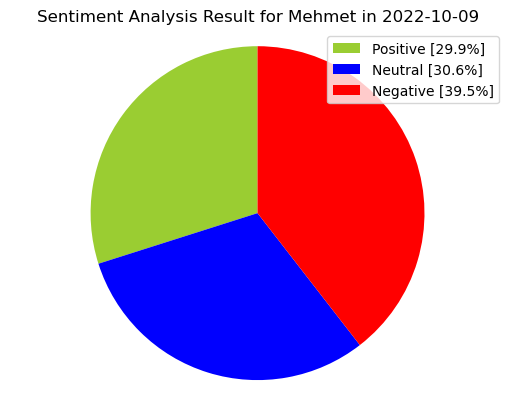

total number:  1188
positive number:  283
negative number:  629
neutral number:  276


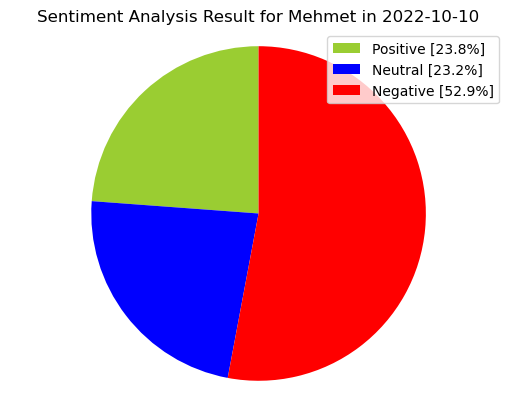

total number:  1161
positive number:  247
negative number:  781
neutral number:  133


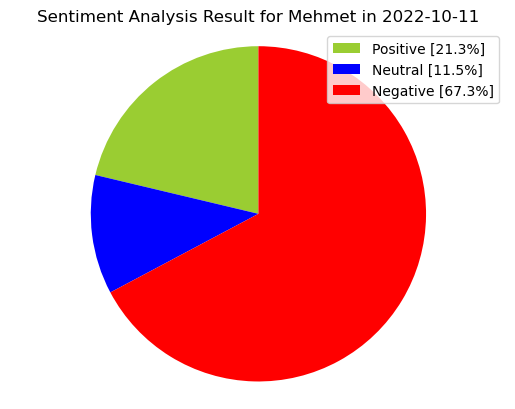

total number:  1200
positive number:  643
negative number:  345
neutral number:  212


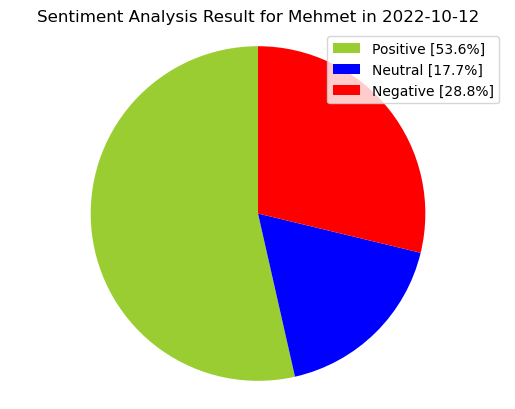

total number:  1200
positive number:  397
negative number:  366
neutral number:  437


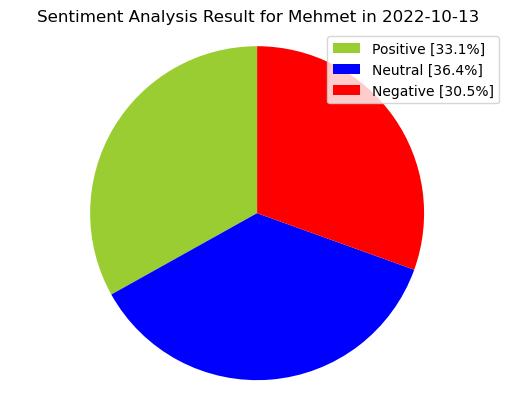

total number:  1200
positive number:  565
negative number:  276
neutral number:  359


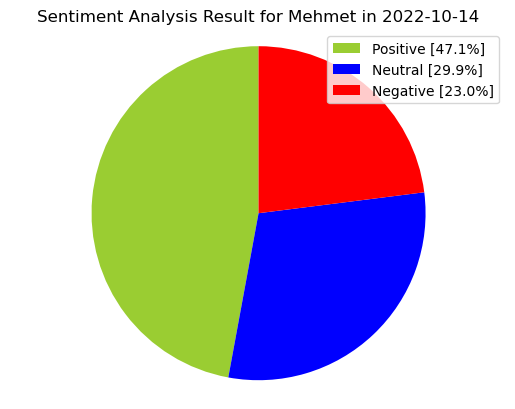

In [109]:
dates = ["2022-10-09", "2022-10-10", "2022-10-11", "2022-10-12", "2022-10-13", "2022-10-14"]

for date in dates:
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    neutral_list = []
    negative_list = []
    positive_list = []

    tmp_tweets = data_M[data_M['date'] == date]['text'].values
    noOfTweet = len(tmp_tweets)

    for tweet in tmp_tweets:
        #print(tweet)
        #print(tweet.created_at)
        tweet_list.append(tweet)
        analysis = TextBlob(tweet)

        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet)
            positive += 1
        elif pos == neg:
            neutral_list.append(tweet)
            neutral += 1

    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')

    #Number of Tweets (Total, Positive, Negative, Neutral)
    tweet_list = pd.DataFrame(tweet_list)
    neutral_list = pd.DataFrame(neutral_list)
    negative_list = pd.DataFrame(negative_list)
    positive_list = pd.DataFrame(positive_list)
    print("total number: ",len(tweet_list))
    print("positive number: ",len(positive_list))
    print("negative number: ", len(negative_list))
    print("neutral number: ",len(neutral_list))

    #Creating PieCart
    labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
    sizes = [positive, neutral, negative]
    colors = ['yellowgreen', 'blue','red']
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use('default')
    plt.legend(labels)
    plt.title("Sentiment Analysis Result for Mehmet in " + date)
    plt.axis('equal')
    plt.show()

total number:  1200
positive number:  319
negative number:  451
neutral number:  430


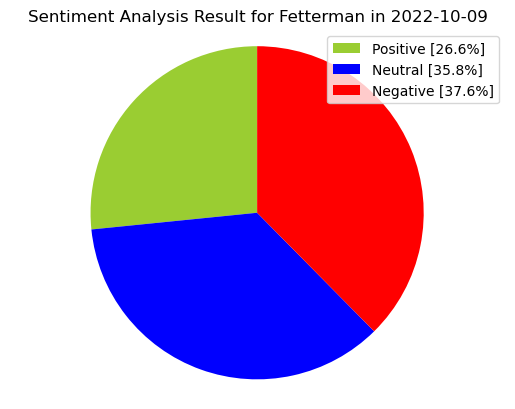

total number:  1200
positive number:  288
negative number:  586
neutral number:  326


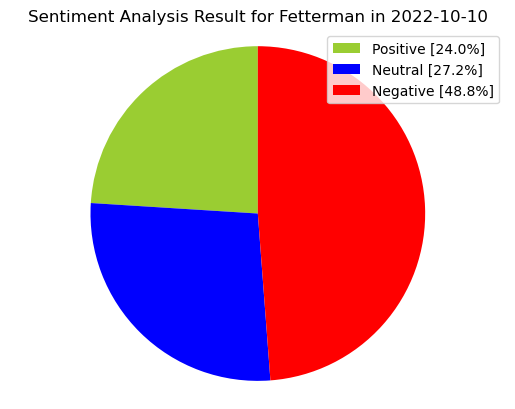

total number:  1200
positive number:  274
negative number:  604
neutral number:  322


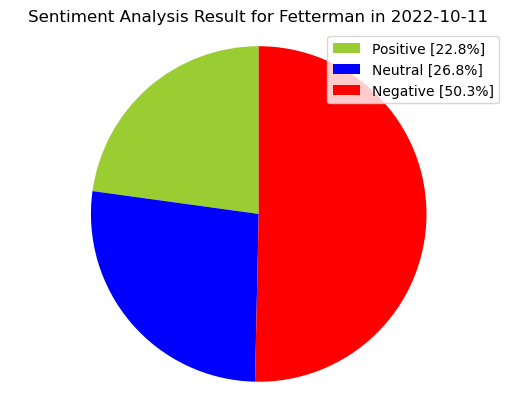

total number:  1200
positive number:  602
negative number:  301
neutral number:  297


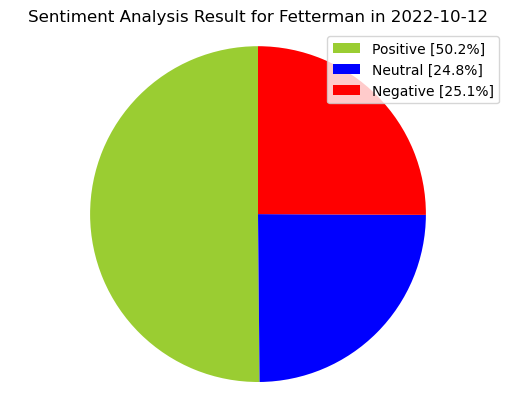

total number:  1200
positive number:  449
negative number:  414
neutral number:  337


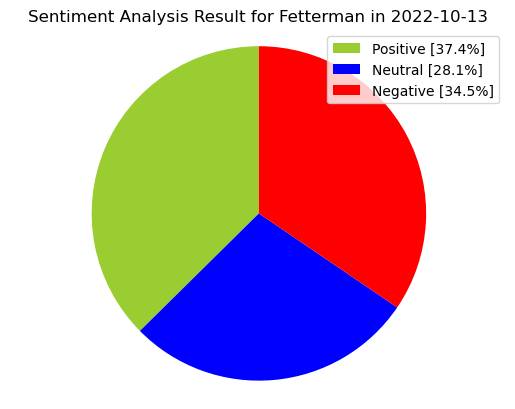

total number:  1200
positive number:  418
negative number:  405
neutral number:  377


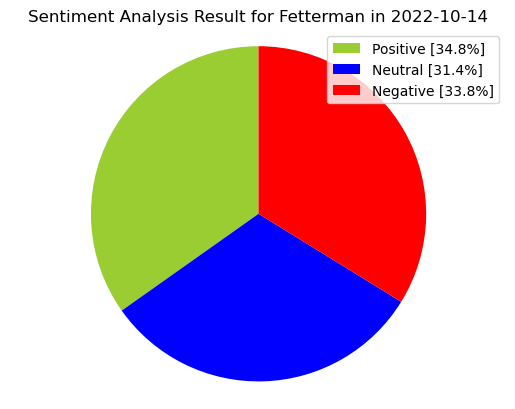

In [111]:
for date in dates:
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    neutral_list = []
    negative_list = []
    positive_list = []

    tmp_tweets = data_F[data_F['date'] == date]['text'].values
    noOfTweet = len(tmp_tweets)

    for tweet in tmp_tweets:
        #print(tweet)
        #print(tweet.created_at)
        tweet_list.append(tweet)
        analysis = TextBlob(tweet)

        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet)
            positive += 1
        elif pos == neg:
            neutral_list.append(tweet)
            neutral += 1

    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')

    #Number of Tweets (Total, Positive, Negative, Neutral)
    tweet_list = pd.DataFrame(tweet_list)
    neutral_list = pd.DataFrame(neutral_list)
    negative_list = pd.DataFrame(negative_list)
    positive_list = pd.DataFrame(positive_list)
    print("total number: ",len(tweet_list))
    print("positive number: ",len(positive_list))
    print("negative number: ", len(negative_list))
    print("neutral number: ",len(neutral_list))

    #Creating PieCart
    labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
    sizes = [positive, neutral, negative]
    colors = ['yellowgreen', 'blue','red']
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use('default')
    plt.legend(labels)
    plt.title("Sentiment Analysis Result for Fetterman in " + date)
    plt.axis('equal')
    plt.show()